![imagenes](logo.png)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 7)

### Ejemplo 1: Análisis de sentimiento en texto

Las RNN funciona de forma particularmente bien a la hora de tratar con texto, ya que por definición el texto es una secuencia ordenada de palabras, y las RNN están especializadas en información secuencial.

En este ejemplo vamos a hacer un modelo que haga **Análisis de Sentimiento**. Estos análisis consisten en dado un texto, predecir si el texto es un texto con tono positivo o negativo.

Para ello vamos a usar un dataset de entrenamiento creado por la Sociedad Española del Procesado de Lenguaje Natural (SEPLN), y que usan en una conferencia llamada TASS (Taller de Análisis Semántico en la SEPLN).

### Cargamos los datos

In [2]:
import pandas as pd
pd.set_option('max_colwidth',1000)

In [190]:
tweets_corpus = pd.read_csv("texto_extendido.csv",encoding = "latin-1")

In [191]:
tweets_corpus.head(10)

,content,polarity,agreement
0,"Salgo de #VeoTV , que día más largoooooo...",NONE,AGREEMENT
1,@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias,NEU,DISAGREEMENT
2,@marodriguezb Gracias MAR,P,AGREEMENT
3,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N+,AGREEMENT
4,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P+,AGREEMENT
5,"RT @FabHddzC: Si amas a alguien, déjalo libre. Si grita ese hombre es mío era @paurubio...",NONE,AGREEMENT
6,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P+,AGREEMENT
7,Hoy asisitiré en Madrid a un seminario sobre la Estrategia Española de Seguridad organizado por FAES.,NONE,AGREEMENT
8,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P+,AGREEMENT
9,Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb,P+,AGREEMENT


In [192]:
tweets_corpus.shape

(7219, 3)

In [196]:
tweets_corpus = tweets_corpus.rename(columns={"polarity":"value"})

In [197]:
tweets_corpus.columns

Index(['content', 'value', 'agreement'], dtype='object')

In [204]:
tweets_corpus = tweets_corpus.astype("str")

In [205]:
tweets_corpus.value.value_counts()

P+      1652
NONE    1483
N       1335
P       1232
N+       847
NEU      670
Name: value, dtype: int64

In [206]:
polaridades = pd.get_dummies(tweets_corpus.value)
polaridades.head()

,N,N+,NEU,NONE,P,P+
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1


In [207]:
polaridades_one_hot = polaridades.values
polaridades_one_hot[:5]

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [208]:
polaridades_dict = dict(zip(range(6), polaridades.columns))
polaridades_dict

{0: 'N', 1: 'N+', 2: 'NEU', 3: 'NONE', 4: 'P', 5: 'P+'}

### Procesamos el texto

In [209]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Vamos a tokenizar los tweets. Vamos a convertirlos en vectores de números, donde cada número representa una palabra. Usaremos las 1500 palabrás más comunes en el dataset

In [210]:
max_palabras = 1500
tokenizer = Tokenizer(num_words=max_palabras)
tokenizer.fit_on_texts(tweets_corpus.content.values)
X = tokenizer.texts_to_sequences(tweets_corpus.content.values)
X = pad_sequences(X)

In [211]:
X.shape

(7219, 42)

In [212]:
X[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, 10, 54, 36])

Vemos que el tweet más largo tiene 32 palabras.

In [213]:
tokenizer.word_index


{'de': 1,
 'la': 2,
 'el': 3,
 'en': 4,
 'a': 5,
 't': 6,
 'co': 7,
 'http': 8,
 'y': 9,
 'que': 10,
 'los': 11,
 'no': 12,
 'del': 13,
 'con': 14,
 'un': 15,
 'es': 16,
 'para': 17,
 'las': 18,
 'se': 19,
 'por': 20,
 'lo': 21,
 'rt': 22,
 'una': 23,
 'me': 24,
 'q': 25,
 'al': 26,
 '\x93': 27,
 'd': 28,
 'hoy': 29,
 'su': 30,
 'ha': 31,
 'mi': 32,
 'como': 33,
 'si': 34,
 'rajoy': 35,
 'más': 36,
 'gracias': 37,
 'pp': 38,
 'pero': 39,
 'ya': 40,
 'esta': 41,
 'gobierno': 42,
 'sobre': 43,
 'todos': 44,
 'psoe': 45,
 'os': 46,
 'mañana': 47,
 'muy': 48,
 'nos': 49,
 'hay': 50,
 'está': 51,
 'ahora': 52,
 'o': 53,
 'día': 54,
 'españa': 55,
 '\x94': 56,
 'le': 57,
 'días': 58,
 'vía': 59,
 'te': 60,
 'todo': 61,
 'madrid': 62,
 'qué': 63,
 'congreso': 64,
 'sin': 65,
 'buenos': 66,
 'mas': 67,
 '20': 68,
 'este': 69,
 'dice': 70,
 '30': 71,
 'gran': 72,
 'yo': 73,
 'ver': 74,
 'ser': 75,
 'rubalcaba': 76,
 'he': 77,
 'han': 78,
 '2': 79,
 'desde': 80,
 'portada': 81,
 'va': 82,
 'alej

Podemos crear un mapa inverso de la lista de palabras, esto nos permite reconstruir un tweet en función de su versión vectorizada

In [214]:
mapa_inverso = dict(map(reversed, tokenizer.word_index.items()))

In [215]:
mapa_inverso

{1: 'de',
 2: 'la',
 3: 'el',
 4: 'en',
 5: 'a',
 6: 't',
 7: 'co',
 8: 'http',
 9: 'y',
 10: 'que',
 11: 'los',
 12: 'no',
 13: 'del',
 14: 'con',
 15: 'un',
 16: 'es',
 17: 'para',
 18: 'las',
 19: 'se',
 20: 'por',
 21: 'lo',
 22: 'rt',
 23: 'una',
 24: 'me',
 25: 'q',
 26: 'al',
 27: '\x93',
 28: 'd',
 29: 'hoy',
 30: 'su',
 31: 'ha',
 32: 'mi',
 33: 'como',
 34: 'si',
 35: 'rajoy',
 36: 'más',
 37: 'gracias',
 38: 'pp',
 39: 'pero',
 40: 'ya',
 41: 'esta',
 42: 'gobierno',
 43: 'sobre',
 44: 'todos',
 45: 'psoe',
 46: 'os',
 47: 'mañana',
 48: 'muy',
 49: 'nos',
 50: 'hay',
 51: 'está',
 52: 'ahora',
 53: 'o',
 54: 'día',
 55: 'españa',
 56: '\x94',
 57: 'le',
 58: 'días',
 59: 'vía',
 60: 'te',
 61: 'todo',
 62: 'madrid',
 63: 'qué',
 64: 'congreso',
 65: 'sin',
 66: 'buenos',
 67: 'mas',
 68: '20',
 69: 'este',
 70: 'dice',
 71: '30',
 72: 'gran',
 73: 'yo',
 74: 'ver',
 75: 'ser',
 76: 'rubalcaba',
 77: 'he',
 78: 'han',
 79: '2',
 80: 'desde',
 81: 'portada',
 82: 'va',
 83: '

Así si tomamos el primer tweet

In [216]:
tweets_corpus.content.values[0]

'Salgo de #VeoTV , que día más largoooooo...'

Vemos su versión vectorizada:

In [217]:
X[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, 10, 54, 36])

Podemos reconstruirlo con el mapa_inverso del tokenizador

In [218]:
[mapa_inverso[i] for i in X[0] if i in mapa_inverso]

['de', 'que', 'día', 'más']

### Creamos la RNN

Como capa de entrada vamos a usar la capa [`Embedding`](https://keras.io/layers/embeddings/). Es una capa que se encarga de transformar una matriz de texto (donde cada número representa una palabra), en una matriz que representa las relaciones entre las frases  en función de sus palabras.

Digamos que un Embedding (word embedding) es una forma mejor de representar texto (captura mejor la información).

In [219]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU

numero_clases = 6

modelo_sentimiento = Sequential()
modelo_sentimiento.add(Embedding(max_palabras, 128, input_length=X.shape[1]))
modelo_sentimiento.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
modelo_sentimiento.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
#modelo_sentimiento.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))

modelo_sentimiento.add(Dense(numero_clases, activation='softmax'))

In [220]:
modelo_sentimiento.compile(loss = 'categorical_crossentropy', optimizer='adam',
                           metrics = ['accuracy'])
print(modelo_sentimiento.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 42, 128)           192000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 42, 256)           394240    
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 1542      
Total params: 1,113,094
Trainable params: 1,113,094
Non-trainable params: 0
_________________________________________________________________
None


In [221]:
from sklearn.model_selection import train_test_split

Y = polaridades_one_hot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [224]:
from keras.callbacks import EarlyStopping
batch_size = 256
early_stop = EarlyStopping(monitor='accuracy', min_delta=0.00001, patience=5, verbose=1)
modelo_sentimiento.fit(X_train, Y_train, epochs=50, batch_size=batch_size, verbose=1,
                      callbacks=[early_stop]);

Epoch 1/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1323 - accuracy: 0.9546
Epoch 2/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1432 - accuracy: 0.9519
Epoch 3/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1442 - accuracy: 0.9515
Epoch 4/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1536 - accuracy: 0.9489
Epoch 5/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1310 - accuracy: 0.9550
Epoch 6/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1273 - accuracy: 0.9558
Epoch 7/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1229 - accuracy: 0.9591
Epoch 8/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1201 - accuracy: 0.9588
Epoch 9/50
5775/5775 [==============================] - 31s 5ms/step - loss: 0.1239 - accuracy: 0.9577
Epoch 10/50
5775/5775 [==============================] - 31s 5ms/step - l

Ahora evaluamos con los datos de test

In [225]:
loss, precision_test = modelo_sentimiento.evaluate(X_test, Y_test)
precision_test

1444/1444 [==============================] - 6s 4ms/step


0.35664820671081543

Ahora podemos tomar una nueva frase y predecir su polaridad

In [236]:
nueva_frase = "Tengo miedo"

In [237]:
nueva_frase_tokenizada = tokenizer.texts_to_sequences([nueva_frase])
nueva_frase_tokenizada_pad = pad_sequences(nueva_frase_tokenizada, maxlen=42)

In [238]:
nueva_frase_tokenizada

[[174, 339]]

In [239]:
nueva_frase_tokenizada_pad

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 174, 339]])

In [240]:
modelo_sentimiento.predict_classes(nueva_frase_tokenizada_pad)

array([3], dtype=int64)

In [241]:
polaridades_dict[3]

'NONE'

### Series Temporales 

Vamos a usar un dataset que contiene el número de pasajeros de avión internacionales por mes, obtenido de [este link](https://www.kaggle.com/andreazzini/international-airline-passengers).

En concreto vamos a intentar predecir el número de pasajeros de líneas aereas los últimos meses del dataset.

### Cargamos los datos

In [54]:
import pandas as pd

pasajeros = pd.read_csv("international-airline-passengers.csv",sep=";")
pasajeros.columns = ["mes", "pasajeros"]

In [55]:
pasajeros.head()

,mes,pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


La variable objetivo de este modelo será predecir el volumen de pasajeros del mes siguiente. Podemos usar la función de pandas `shift` para mover la columna del número de pasajeros una posición hacia arriba.

In [56]:
pasajeros["pasajeros_1"] = pasajeros["pasajeros"].shift(-1)

In [57]:
pasajeros.tail()

,mes,pasajeros,pasajeros_1
139,1960-08,606,508.0
140,1960-09,508,461.0
141,1960-10,461,390.0
142,1960-11,390,432.0
143,1960-12,432,NaN


Al hacer esto la última fila no tiene un valor para predecir, la eliminamos.

In [58]:
pasajeros = pasajeros.drop(143)

In [59]:
pasajeros_x = pasajeros["pasajeros"].astype(float).values
pasajeros_y = pasajeros["pasajeros_1"].astype(float).values

In [60]:
n_periodos = len(pasajeros)
pct_test = 0.2

n_train = int(n_periodos * (1-pct_test))
n_train

114

Como siempre, estandarizamos los datos

In [61]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(pasajeros_x.reshape(-1, 1))

pasajeros_x_std = scaler.transform(pasajeros_x.reshape(-1, 1))
pasajeros_y_std = scaler.transform(pasajeros_y.reshape(-1, 1))

In [62]:
x_train = pasajeros_x_std[:n_train]
x_test = pasajeros_x_std[n_train:]

y_train = pasajeros_y_std[:n_train]
y_test = pasajeros_y_std[n_train:]

In [63]:
x_train = x_train.reshape(-1,1,1)
x_test = x_test.reshape(-1,1,1)

In [64]:
x_train.shape

(114, 1, 1)

In [89]:
modelo_lstm = Sequential()
modelo_lstm.add(GRU(32, return_sequences = True,input_shape=(1, 1)))
modelo_lstm.add(GRU(32,return_sequences = True))
modelo_lstm.add(GRU(32))
modelo_lstm.add(Dense(1))
modelo_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 1, 32)             3264      
_________________________________________________________________
gru_16 (GRU)                 (None, 1, 32)             6240      
_________________________________________________________________
gru_17 (GRU)                 (None, 32)                6240      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 15,777
Trainable params: 15,777
Non-trainable params: 0
_________________________________________________________________


In [90]:
modelo_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
modelo_lstm.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1);

Epoch 1/100
114/114 [==============================] - 1s 13ms/step - loss: 0.2301 - mean_squared_error: 0.2301
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0563 - mean_squared_error: 0.0563
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0502 - mean_squared_error: 0.0502
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 7/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 8/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 9/100
114/114 [==============================] - 0s 3ms/step - loss: 0.0570 - mean_squared_error: 0.0570


In [91]:
from sklearn.metrics import mean_squared_error
train_pred = scaler.inverse_transform(modelo_lstm.predict(x_train))
y_train_original = scaler.inverse_transform(y_train)
error_train = np.sqrt(mean_squared_error(y_train_original, train_pred))

error_train

26.635494419974165

In [92]:
from sklearn.metrics import mean_squared_error

test_pred = scaler.inverse_transform(modelo_lstm.predict(x_test))
y_test_original = scaler.inverse_transform(y_test)
error_test = np.sqrt(mean_squared_error(y_test_original, test_pred))

error_test

56.9688221174478

In [93]:
test_pred.shape

(29, 1)

In [94]:
test_pred_plot = np.zeros(pasajeros_y.shape)
test_pred_plot[-test_pred.shape[0]:] = test_pred[:,0]

test_pred_plot[:-test_pred.shape[0]] = np.nan

In [95]:
test_pred_plot

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

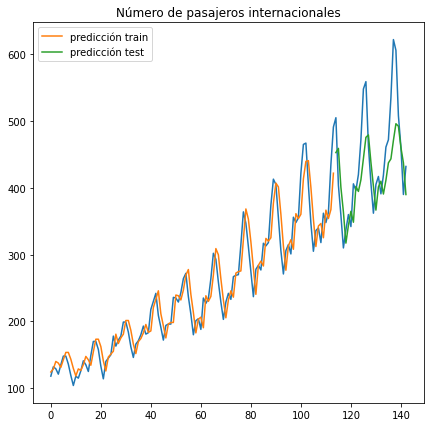

In [96]:
plt.plot(pasajeros_y)
plt.plot(train_pred, label="predicción train")
plt.plot(test_pred_plot, label="predicción test")
plt.title("Número de pasajeros internacionales")
plt.legend();